In [1]:
from prepocessing import DataProcessor

In [2]:
Processor = DataProcessor()
X_train, X_test, y_train, y_test = Processor.get_datas()
X_test.dtype

dtype('float64')

In [17]:
X_train.shape

(27455, 28, 28, 1)

In [3]:
X_test.shape

(7172, 28, 28, 1)

In [4]:
from Modello import model
from Training import training

In [5]:
model_1=model(num_k=[32,64,128], k_size=[3,3,3], p_size=[2,2,2], num_n=256)
training_1=training(model=model_1.model,X_train=X_train,y_train=y_train, ep=5, b_size=32, val_split=0.1)

C:\Users\perri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
773/773 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2916 - loss: 2.2766 - val_accuracy: 0.8649 - val_loss: 0.4219
Epoch 2/5
773/773 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8661 - loss: 0.3894 - val_accuracy: 0.9508 - val_loss: 0.1603
Epoch 3/5
773/773 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9568 - loss: 0.1343 - val_accuracy: 0.9898 - val_loss: 0.0376
Epoch 4/5
773/773 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9857 - loss: 0.0505 - val_accuracy: 0.9913 - val_loss: 0.0255
Epoch 5/5
773/773 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9914 - loss: 0.0325 - val_accuracy: 0.9978 - val_loss: 0.0087


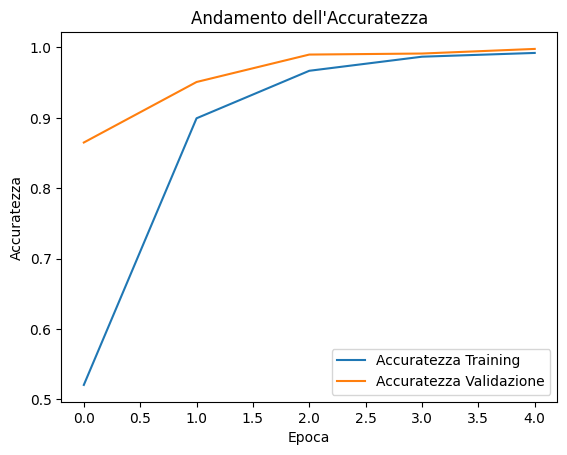

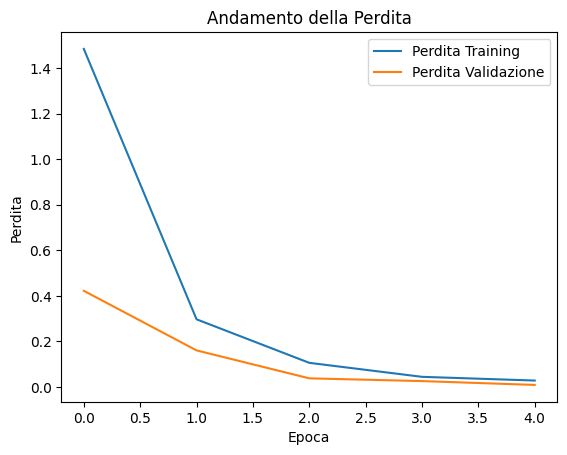

In [6]:
training_1.grafico_accuracy()
training_1.grafico_loss()

In [7]:
from Testing import testing

In [8]:
testing_1=testing(model=training_1.trained_model, X_test=X_test, y_test=y_test)
print(testing_1.test_loss, testing_1.test_accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8838 - loss: 0.4836
0.46901312470436096 0.8842721581459045


In [9]:
predicted_classes, true_classes = testing_1.predictions(X_test, y_test)
predicted_classes

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [10]:
for index in range(len(predicted_classes)):
    if predicted_classes[index] >= 9:
        predicted_classes[index] +=1

predicted_classes

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [11]:
for index in range(len(true_classes)):
    if true_classes[index] >= 9:
        true_classes[index] +=1

true_classes

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

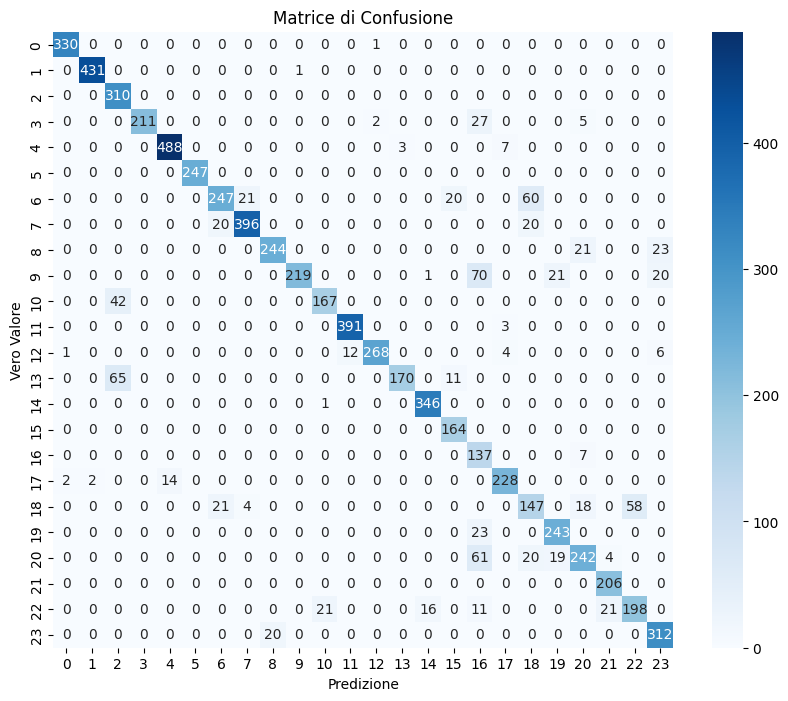

In [12]:
testing_1.confusionmatrix(true_classes, predicted_classes)

In [13]:
true_classes

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

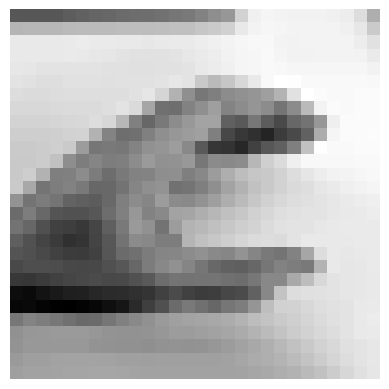

[0.47058824 0.47058824 0.47058824 0.47058824 0.48627451 0.49803922
 0.50588235 0.50980392 0.52156863 0.5254902  0.52941176 0.5372549
 0.54901961 0.56078431 0.58039216 0.61176471 0.63529412 0.78823529
 0.86666667 0.87843137 0.8745098  0.87058824 0.87058824 0.87058824
 0.86666667 0.85882353 0.81568627 0.69411765 0.71372549 0.71764706
 0.71764706 0.71764706 0.7254902  0.72941176 0.72941176 0.72941176
 0.73333333 0.73333333 0.73333333 0.7372549  0.74117647 0.74117647
 0.75686275 0.76862745 0.78431373 0.84705882 0.8745098  0.88235294
 0.87843137 0.8745098  0.8745098  0.8745098  0.8745098  0.86666667
 0.84313725 0.76862745 0.84705882 0.84705882 0.84705882 0.84705882
 0.85098039 0.85490196 0.85098039 0.85098039 0.84705882 0.84705882
 0.84313725 0.84705882 0.85098039 0.85098039 0.85882353 0.86666667
 0.8745098  0.88235294 0.88627451 0.88627451 0.8745098  0.87058824
 0.8745098  0.8745098  0.8745098  0.8745098  0.85882353 0.82745098
 0.84705882 0.84705882 0.84705882 0.84705882 0.85098039 0.84705

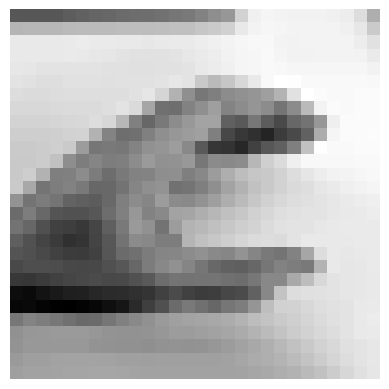

In [14]:
from Conversione_immagini import ImageConverter

img_path = 'test_images/prova2.jpeg'

Converter = ImageConverter(img_path)
Converter.show_image()
array = Converter.image_array()

In [19]:
array.shape
array2 = array.reshape(1,28,28,1)
array2.shape

(1, 28, 28, 1)

In [21]:
predicted, true = testing_1.predictions(array2, y_test)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([0], dtype=int64)